In [1]:
#Import libraries
from predictions import prediction
import pandas as pd

#Read variable excel
variables_df = pd.read_csv('variables_df.csv', index_col=[0])

#Extract variables
variables_dict = variables_df.to_dict()['0']
batch_size = int(variables_dict['batch_size_valid'])
window_size = int(variables_dict['window_size'])
sentiment = bool(variables_dict['sentiment'])
sentiment_type = variables_dict['sentiment_type']
ticker = variables_dict['ticker']
excel_reports = variables_dict['excel_reports']
entry_candle = variables_dict['entry_candle']
model_name = variables_dict['model_name']
indicator1 = int(variables_dict['indicator1'])
indicator2 = int(variables_dict['indicator2'])
indicator3 = int(variables_dict['indicator3'])
aggr_function = variables_dict['aggr_function']
condition = bool(variables_dict['condition'])
period = variables_dict['period']
formation_window = int(variables_dict['formation_window'])

# Read excels
x_test = pd.read_csv(f'{ticker}_test_data.csv', index_col=[0])
x_test_x = pd.read_csv(f'{ticker}_x_test_x.csv', index_col=[0])
news_df = pd.read_excel(
        f'{ticker}_sentiment_analysis_final.xlsx', index_col=[0])
Dates = pd.read_csv(f'{ticker}_Dates.csv', index_col=[0])
Dates = Dates.iloc[:, 0]

#Run it
performance_df = prediction()

31/31 [==============================] - 3s 49ms/step
--------> GetTensoredDataset completed

--------> ReverseNormalization completed

--------> GetFinalDataframe



In [2]:
from final_evaluation import GetModelPerformance

print(f"ticker: {str.upper(ticker)}\n")

GetModelPerformance = GetModelPerformance()

GetModelPerformance.fit(acceptance=0,
                            penalization=0,
                            entry_candle='Current Open',  # Current Open
                            budget=10000,
                            window_size=window_size,
                            export_excel=False,
                            excel_path=excel_reports,
                            sentiment=sentiment)

trades_df = GetModelPerformance.transform(performance_df)



ticker: CLB

Formations:  31
period: 2022-05-09 - 2023-01-02
Entry Candle:  Current Open

Total Trades:  25
Profit Trades:  16
Loss Trades:  9

Win Ratio: 64.0 %
Loss Ratio: 36 %

Trade nr with exact TP:  4
Ratio of exact TP: 16.0 %

Average profit per trade:  306

Gross profit:  7659
Gross loss:  -7778

Net profit:  -119


In [3]:
from final_evaluation import GetPerformanceReport

GetPerformanceReport = GetPerformanceReport()

GetPerformanceReport.fit(entry_candle=entry_candle,
                             budget=10000,
                             window_size=window_size,
                             export_excel=False,
                             excel_path=excel_reports)

trades_df_final = GetPerformanceReport.transform(trades_df)

--------> GetPerformanceReport completed



In [18]:
window = 6
rolling_mean_pred = x2.rolling(window=window).mean().fillna(method='backfill')
rolling_mean_pred

5      24.661022
11     24.661022
17     24.661022
23     24.661022
29     24.661022
35     24.661022
41     23.736437
47     22.982818
53     22.248965
59     21.575330
65     21.060322
71     20.676628
77     20.419382
83     20.184903
89     19.890956
95     19.627893
101    19.328525
107    19.072666
113    18.730298
119    18.968702
125    19.323901
131    19.682449
137    20.205595
143    20.657459
149    21.125507
Name: prediction, dtype: float64

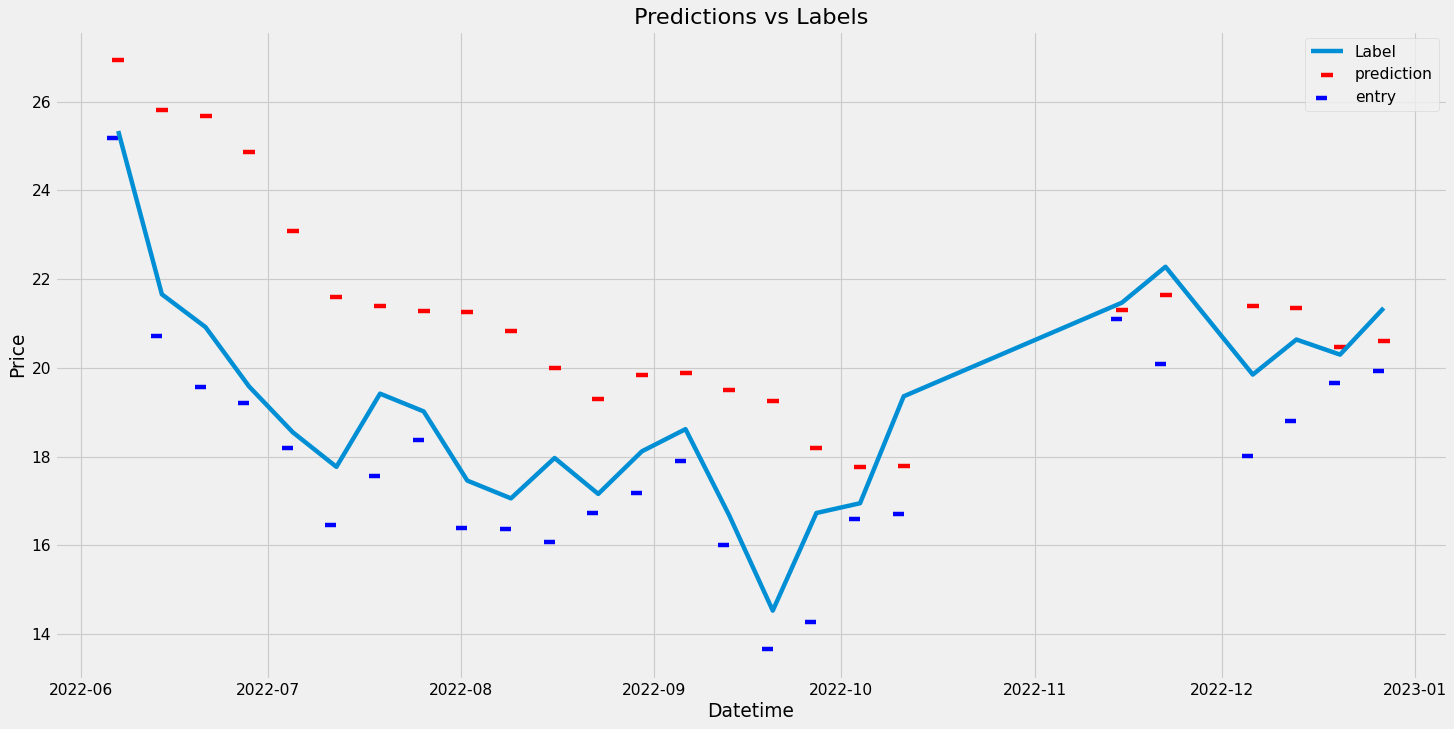

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings


warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
figure(figsize=(20, 10), dpi=80)

df_plot = trades_df_final[['Datetime','labels','prediction','Entry']]
df_plot = df_plot[df_plot.labels != 'nn']

x1 = df_plot['labels']
x2 = df_plot['prediction']
entry = df_plot['Entry']
y = df_plot['Datetime']

# plot lines
plt.plot(y, x1, label = "Label")
plt.scatter(y, x2, label = "prediction",color='red', s=100,marker='_')
plt.scatter(y, entry, label = "entry",color='blue', s=100,marker=0)
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.title('Predictions vs Labels')
plt.legend()
plt.show()

In [7]:
import numpy as np
np.std(x2)
len(x1)

25

In [ ]:
from final_evaluation import MakeSinglePrediction

#model_name = f'{saved_models}/{str.upper(ticker)}_{formation_window}_{target_window}_{window_size}_{split_ratio}_{period}_{sentiment}_{start_date}_{end_date}.h5'

MakeSinglePrediction = MakeSinglePrediction()

fit_output = MakeSinglePrediction.fit(
                        model_name=model_name,
                        form_window=formation_window,
                        ticker=ticker,
                        start_date="2019-03-18",
                        end_date="2022-11-27",
                        interval=period, #1wk
                        progress=False,
                        condition=condition,
                        timeperiod1=indicator1,
                        timeperiod2=indicator2,
                        timeperiod3=indicator3,
                        debug=False,
                        budget=10000,
                        penalization=0,
                        acceptance=0,
                        entry_candle='Current Close',
                        news_df=news_df,
                        sentiment=sentiment,
                        sentiment_type = sentiment_type,
                        sentiment_aggr = aggr_function)

#fit method outputs tuple, get only trade formation out of tuple
trade_formation = fit_output[1]
final_trade_formation = trade_formation.head(formation_window)
final_trade_formation
###IMPORTANT!!!!
#trade_formation dataframe must be checked before transformation, sometimes df pulled via yahoo finance 
# is shifted, and trade formation does not have entire formation in itself. in this case there must 
# be changed end_date in fit method
final_trade_formation


In [ ]:
#Make prediction
MakeSinglePrediction.transform(final_trade_formation)

#PLot current chart and sentiment
from plotting import PlotCurrentFormation

PlotCurrentFormation(final_trade_formation,sentiment=sentiment,indicator1=indicator1,indicator2=indicator2,indicator3=indicator3)
